In [1]:
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
from sklearn import model_selection

import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')


# Loading Data

In [2]:
df = pd.read_csv(r"M:\bank-additional\bank-additional-full.csv",sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Checking Categorical Columns

In [4]:
for col in df.columns:
    print()
    if df[col].dtype == 'object':
        print(f'Name of Column is: {col} and unique values are: {df[col].unique()}')



Name of Column is: job and unique values are: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Name of Column is: marital and unique values are: ['married' 'single' 'divorced' 'unknown']

Name of Column is: education and unique values are: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Name of Column is: default and unique values are: ['no' 'unknown' 'yes']

Name of Column is: housing and unique values are: ['no' 'yes' 'unknown']

Name of Column is: loan and unique values are: ['no' 'yes' 'unknown']

Name of Column is: contact and unique values are: ['telephone' 'cellular']

Name of Column is: month and unique values are: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Name of Column is: day_of_week and unique values are: ['mon' 'tue' 'wed' 'thu' 'fri']





Name of Column is: poutcome and unique valu

# Methods

In [5]:
#this function returns categorical variables
def return_categorical(df):

  categorical_columns = [column_name for column_name in df if df[column_name].dtype == 'O']
  return categorical_columns

In [6]:
#this function returns numerical variables
def return_numerical(df):

  return list(set(df.columns) - set(return_categorical(df)))

In [7]:
def check_normal(df):
  fig, axes = plt.subplots(1,len(return_numerical(df)), figsize =(70, 10))

  for i,numeric_column_name in enumerate(list(set(df.columns) -set(return_categorical(df)))):

    sns.distplot(df[numeric_column_name], ax=axes[i]);
    plt.title(f'Distribution of {numeric_column_name}');

In [134]:
def classifier(clf, x_train,x_test,y_train,y_test):
    y_test_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train)
    
    accuracy_test = accuracy_score(y_test,y_test_pred)
    accuracy_train =  accuracy_score(y_train,y_train_pred)
    
    roc_test = roc_auc_score(y_test, y_test_pred, multi_class='ovr')
    roc_train = roc_auc_score(y_train, y_train_pred, multi_class='ovr')
    
    print('Train accuracy is:',accuracy_train )
    print('Test accuracy is:',accuracy_test )
    print('Train ROC is:', roc_train)
    print('Test ROC is:',roc_test )
    
    # Fscore, precision and recall on test data
    f1 = f1_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred) 
    print("F score is:",f1 )
    print("Precision is:",precision)
    print("Recall is:", recall)
    return  y_train_pred ,  y_test_pred 

In [165]:
def prediction_model(model, x_test, y_test):
     
    predict = model.predict(x_test)
    accuracy = accuracy_score(y_test, predict)
    print(model.__class__.__name__+"\t = %0.3f " % accuracy)

In [10]:
# Draw ROC curve from training and test data probability
def draw_roc( train_actual, train_probs, test_actual, test_probs ):
    train_fpr, train_tpr, train_thresholds = metrics.roc_curve( train_actual, train_probs,
                                              drop_intermediate = False )
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve( test_actual, test_probs,
                                              drop_intermediate = False )
    train_auc_score = metrics.roc_auc_score( train_actual, train_probs )
    test_auc_score = metrics.roc_auc_score( test_actual, test_probs )
    plt.figure(figsize=(5, 5))
    plt.plot( train_fpr, train_tpr, label='ROC curve (area = %0.2f)' % train_auc_score )
    plt.plot( test_fpr, test_tpr, label='ROC curve (area = %0.2f)' % test_auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [110]:
def random_search(clf,params, x_train,x_test,y_train,y_test):
    
    random_search = RandomizedSearchCV(estimator= clf, param_distributions=params, scoring='roc_auc', cv=5)
    random_search.fit(x_train, y_train)
    optimal_model = random_search.best_estimator_

    print("Best parameters are: ", random_search.best_params_)
    print()
    print("Best estimator is: ", random_search.best_estimator_)
    print()
    print('Scores and accuracies are:')
    print()
    classifier(optimal_model, x_train,x_test,y_train,y_test)

# EDA


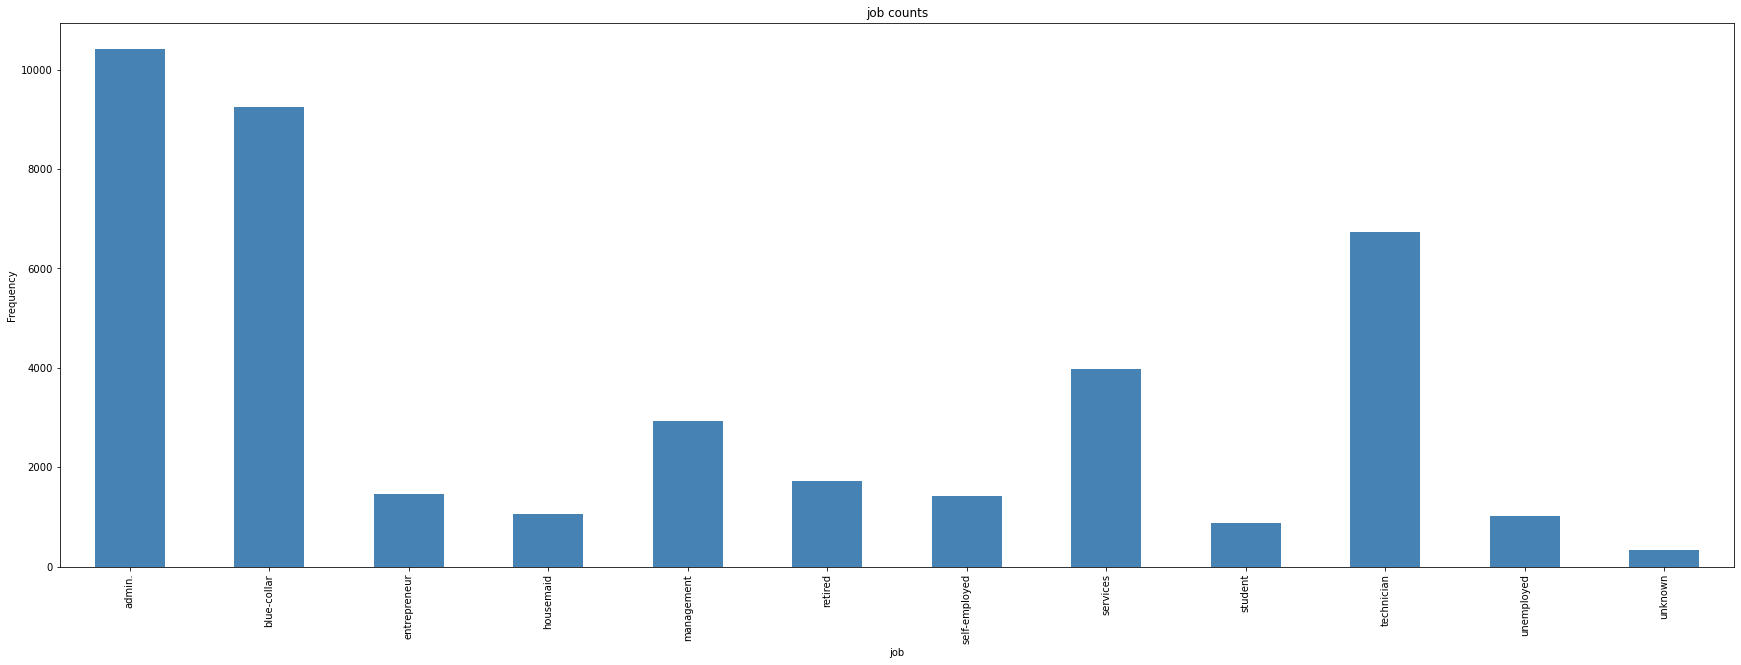

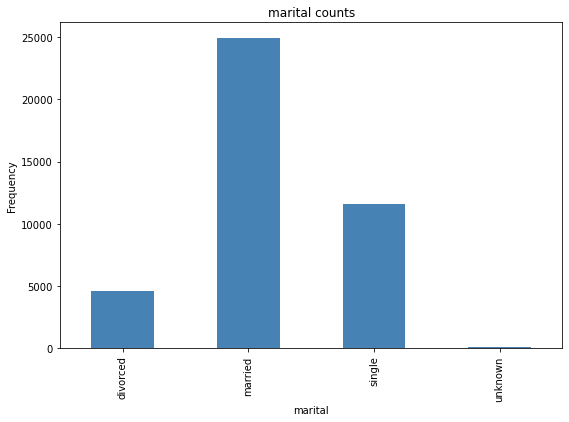

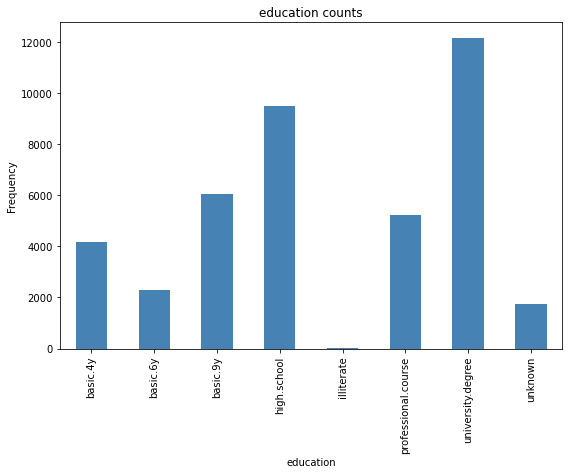

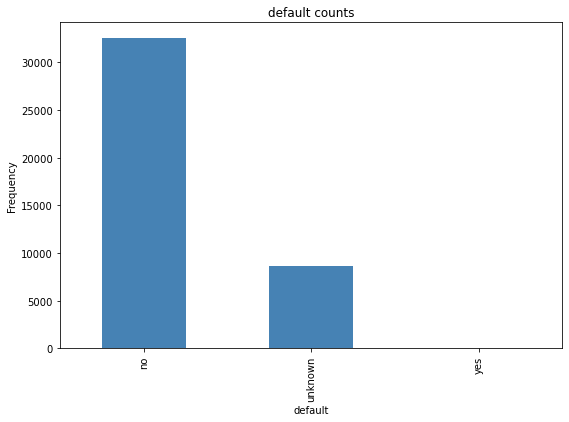

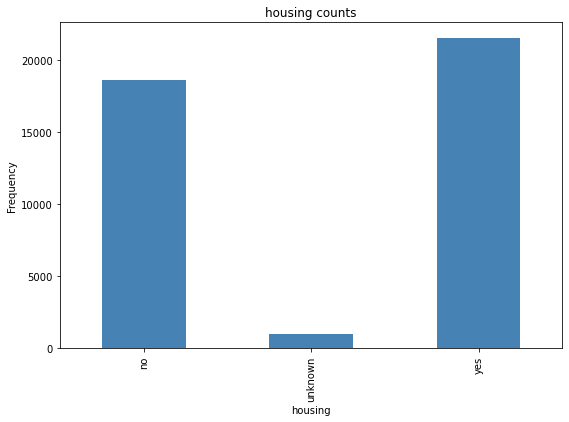

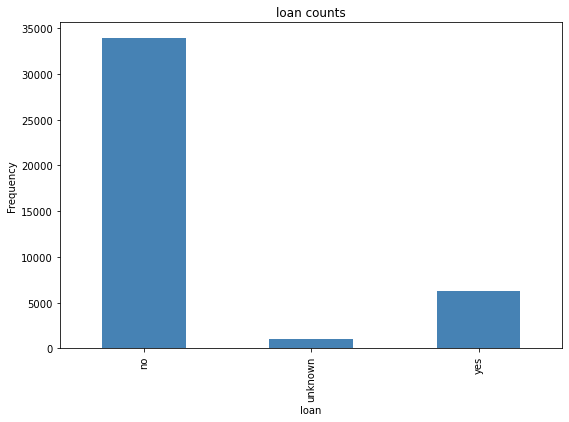

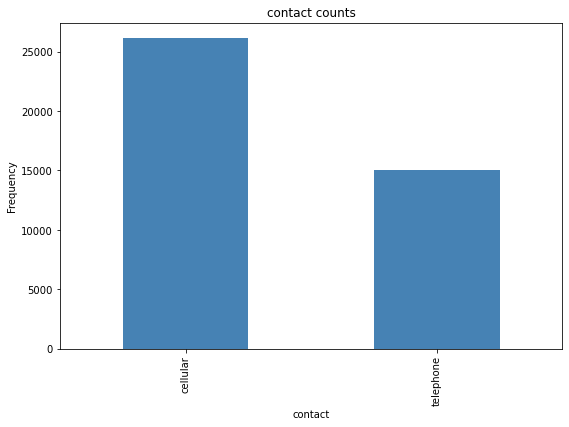

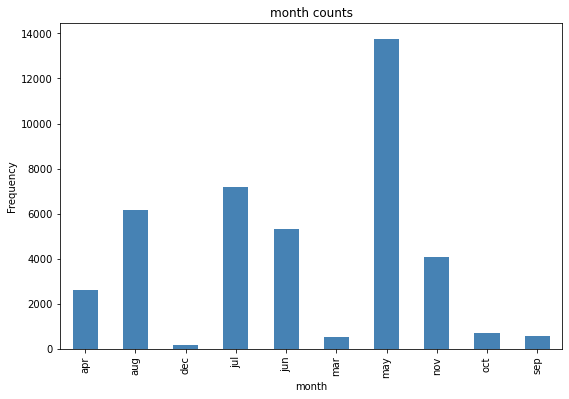

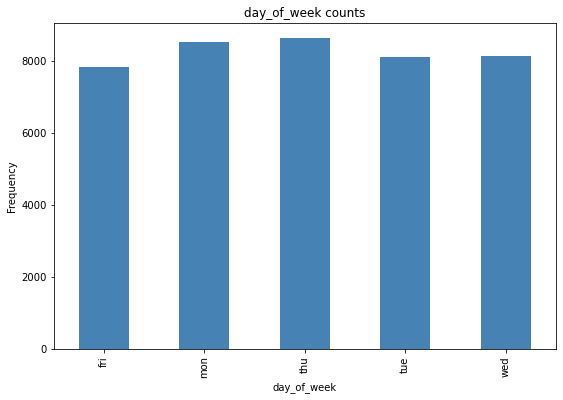

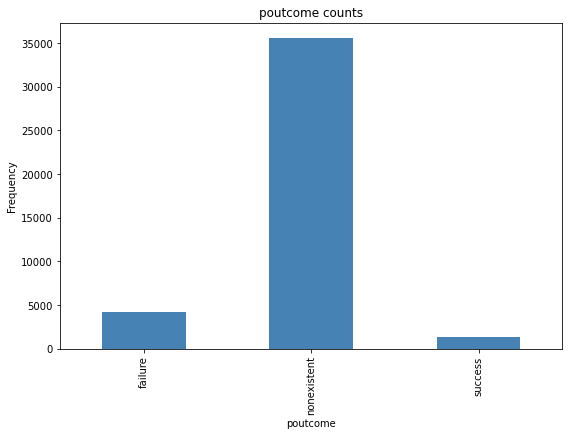

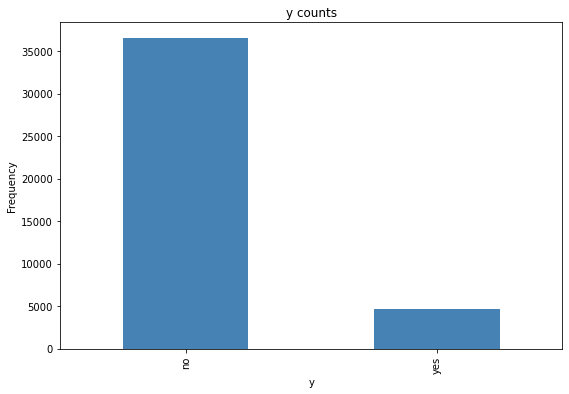

In [12]:
# plotting graphs for all categorical columns
for col in return_categorical(df):
    counts = df[col].value_counts().sort_index()
    if len(counts) > 10:
      fig = plt.figure(figsize=(30, 10))
    else:
      fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [13]:
corr = df.corr()
corr_greater_than_75 = corr[corr>=.75]
corr_greater_than_75

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pdays,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
emp.var.rate,NaN,NaN,NaN,NaN,NaN,1.000000,0.775334,NaN,0.972245,0.906970
cons.price.idx,NaN,NaN,NaN,NaN,NaN,0.775334,1.000000,NaN,NaN,NaN
cons.conf.idx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
euribor3m,NaN,NaN,NaN,NaN,NaN,0.972245,NaN,NaN,1.000000,0.945154
nr.employed,NaN,NaN,NaN,NaN,NaN,0.906970,NaN,NaN,0.945154,1.000000


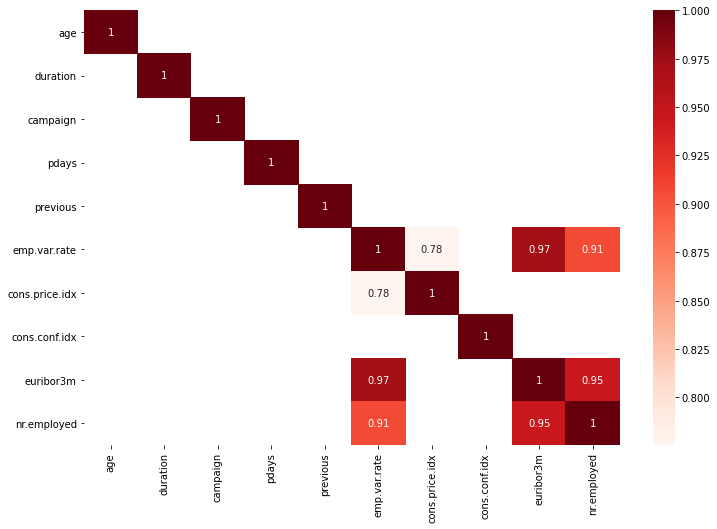

In [14]:
#Visualising by heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_greater_than_75, cmap="Reds", annot = True);

Some correlation can be seen here between emp. var rate and nr.employed.

Also, euribor3m and emp.var rate.

However, I would not be removing any. As I am gonna mostly be training on tree models which doesn't require much preprocessing

In [16]:
#Checking Unique values
df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [15]:
#Modifying The Columns: Assigning Weight On the Basis Of Importance
df['job'] = df['job'].apply(lambda x: -1 if x=='unknown' or x=='unemployed' else (15 if x=='entrepreneur' else (8 if x == 'blue-collar' else ( 6 if x=='technician' or x=='services' or  x=='admin.' or x=='management' else (4 if x== 'self-employed' or x=='student' else (2 if x=='housemaid' or x=='retired' else None) )))))
df['housing'] = df['housing'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
df['loan'] = df['loan'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
df['y'] = df['y'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
df['default'] = df['default'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
df['poutcome'] = df['poutcome'].apply(lambda x: 0 if x=='failure' else (2 if x=='failure' else -1))
df['pdays'] = df['pdays'].apply(lambda x: 0 if x==999 else(20 if x<=10 else(6 if x<=20 else 3)))

In [138]:
#One hot encoding for categorical features
df  = pd.get_dummies(df, drop_first = True)
df.head()

,age,job,default,housing,loan,duration,campaign,pdays,previous,poutcome,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,2,0,0,0,261,1,0,0,-1,...,0,0,1,0,0,0,1,0,0,0
1,57,6,-1,0,0,149,1,0,0,-1,...,0,0,1,0,0,0,1,0,0,0
2,37,6,0,1,0,226,1,0,0,-1,...,0,0,1,0,0,0,1,0,0,0
3,40,6,0,0,0,151,1,0,0,-1,...,0,0,1,0,0,0,1,0,0,0
4,56,6,0,0,1,307,1,0,0,-1,...,0,0,1,0,0,0,1,0,0,0


In [20]:
#Train_Test_Split
x = df.drop("y", axis=1)
y = df['y']
x.sample()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

# LogisticRegression

Train accuracy is: 0.9078093857582895
Test accuracy is: 0.9099536526153167
Train ROC is: 0.6770388078866005
Test ROC is: 0.6875401779334694
F score is: 0.5012224938875306
Precision is: 0.6706652126499455
Recall is: 0.40013012361743655


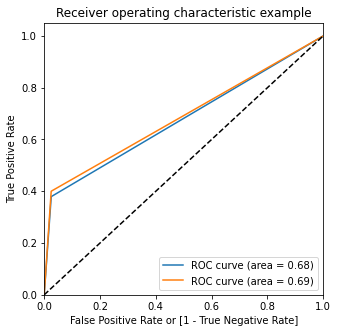

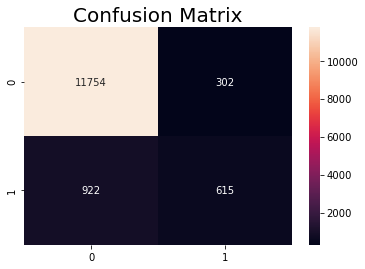

In [135]:
logreg = LogisticRegression(solver='lbfgs', random_state = 100)
logreg = logreg.fit(x_train, y_train)
y_train_pred,y_test_pred = classifier(logreg, x_train, x_test, y_train, y_test)
draw_roc(y_train,y_train_pred,y_test,y_test_pred)

cf_matrix = confusion_matrix(y_test, y_test_pred )
sns.heatmap(cf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix", fontsize=20)
plt.show()

# Naive Bayes

Train accuracy is: 0.8822250407682551
Test accuracy is: 0.8836901346281174
Train ROC is: 0.7011830969265833
Test ROC is: 0.7011178639780784
F score is: 0.4749252739953504
Precision is: 0.48507462686567165
Recall is: 0.4651919323357189


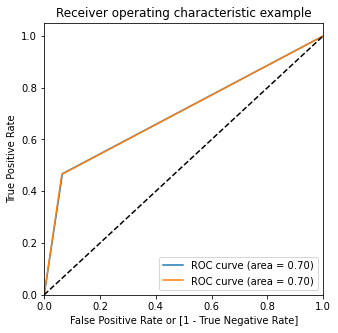

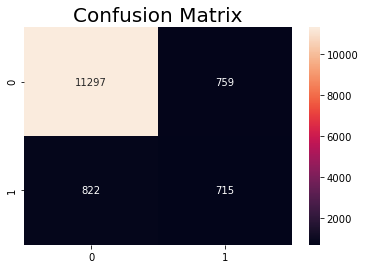

In [136]:
model = GaussianNB()
model.fit(x_train, y_train)
y_train_pred,y_test_pred = classifier(model, x_train, x_test, y_train, y_test)
draw_roc(y_train,y_train_pred,y_test,y_test_pred)

cf_matrix = confusion_matrix(y_test, y_test_pred )
sns.heatmap(cf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix", fontsize=20)
plt.show()

# K-Nearest Neighbors 

Train accuracy is: 0.9168689980068853
Test accuracy is: 0.9108364599426175
Train ROC is: 0.7233733453461743
Test ROC is: 0.704216502774517
F score is: 0.5258215962441315
Precision is: 0.6594700686947988
Recall is: 0.4372153545868575


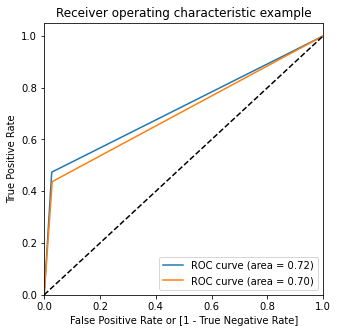

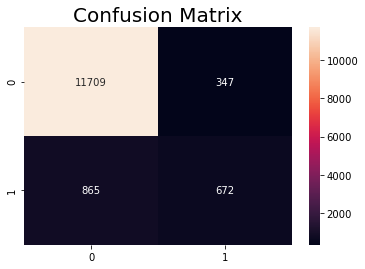

In [137]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(x_train, y_train)
y_train_pred,y_test_pred = classifier(knn, x_train, x_test, y_train, y_test)
draw_roc(y_train , y_train_pred, y_test,  y_test_pred)

cf_matrix = confusion_matrix(y_test, y_test_pred )
sns.heatmap(cf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix", fontsize=20)
plt.show()


# DecisionTree

Train accuracy is: 1.0
Test accuracy is: 0.8907525932465239
Train ROC is: 1.0
Test ROC is: 0.7295091729810872
F score is: 0.5189504373177842
Precision is: 0.516774193548387
Recall is: 0.5211450878334418


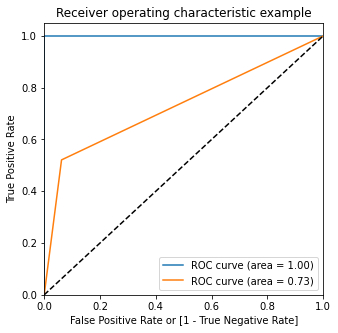

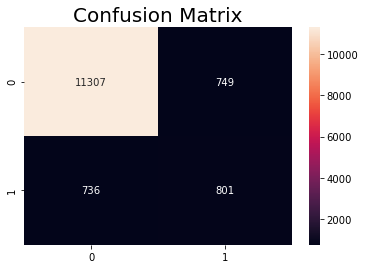

In [159]:
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(x_train, y_train)
y_train_pred,y_test_pred = classifier(dtree, x_train,x_test,y_train,y_test)
draw_roc(y_train,y_train_pred,y_test,y_test_pred)

cf_matrix = confusion_matrix(y_test, y_test_pred )
sns.heatmap(cf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix", fontsize=20)
plt.show()

# RandomForest

Train accuracy is: 1.0
Test accuracy is: 0.9118664018244684
Train ROC is: 1.0
Test ROC is: 0.7258009844753976
F score is: 0.5546468401486989
Precision is: 0.6470078057241977
Recall is: 0.4853610930383865


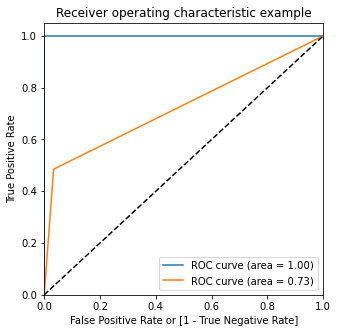

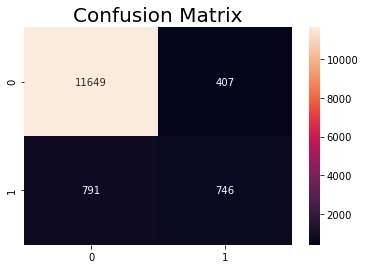

In [161]:
rforest = RandomForestClassifier(random_state=0)
rforest = rforest.fit(x_train, y_train)
y_train_pred,y_test_pred = classifier(rforest, x_train,x_test,y_train,y_test)
draw_roc(y_train,y_train_pred,y_test,y_test_pred)

cf_matrix = confusion_matrix(y_test, y_test_pred )
sns.heatmap(cf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix", fontsize=20)
plt.show()

#  XGBoost

Train accuracy is: 0.9643051277405327
Test accuracy is: 0.9131170455381447
Train ROC is: 0.8833577771802233
Test ROC is: 0.7477937214706991
F score is: 0.5816507261778251
Precision is: 0.6384136858475894
Recall is: 0.5341574495770982


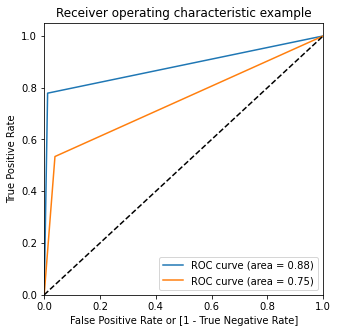

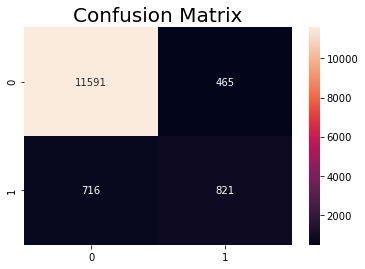

In [162]:
xgb_model = XGBClassifier(verbosity = 0)
xgb_model = xgb_model.fit(x_train, y_train)
y_train_pred,y_test_pred = classifier(xgb_model, x_train,x_test,y_train,y_test)
draw_roc(y_train,y_train_pred,y_test,y_test_pred)

cf_matrix = confusion_matrix(y_test, y_test_pred )
sns.heatmap(cf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix", fontsize=20)
plt.show()

In [167]:
for clf in (logreg, model, knn, dtree, rforest, xgb_model):
    clf.fit(x_train, y_train)
    prediction_model(clf,x_test, y_test)

LogisticRegression	 = 0.910 
GaussianNB	 = 0.884 
KNeighborsClassifier	 = 0.910 
DecisionTreeClassifier	 = 0.891 
RandomForestClassifier	 = 0.912 
XGBClassifier	 = 0.913 


# Tuning Hyper Parameters

In [157]:
dtree.fit(x_train, y_train)
prediction_model(dtree, x_test, y_test)

DecisionTreeClassifier = 0.891


In [158]:
param_grid = {'max_depth':np.arange(3,20),
              'min_samples_split': np.arange(3,20,1),
             'min_samples_leaf':np.arange(3,30),
              'min_samples_split' : np.arange(3,30),
              'criterion': ('gini', 'entropy')}

random_search(DecisionTreeClassifier(random_state=0),param_grid, x_train,x_test,y_train,y_test)

Best parameters are:  {'min_samples_split': 17, 'min_samples_leaf': 25, 'max_depth': 9, 'criterion': 'gini'}

Best estimator is:  DecisionTreeClassifier(max_depth=9, min_samples_leaf=25, min_samples_split=17,
                       random_state=0)

Scores and accuracies are:

Train accuracy is: 0.9256749411125204
Test accuracy is: 0.9118664018244684
Train ROC is: 0.7929244254202533
Test ROC is: 0.7502108734385922
F score is: 0.5814116002795249
Precision is: 0.6279245283018868
Recall is: 0.5413142485361093
